# Week 1 Project: Gapminder Scatter Plot
##### Brunno Gorgulho Soares

## Setup

In [1]:
# Load Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

## Getting data

In [411]:
data_cont = pd.read_csv("data/continents.csv", sep = ';')
data_fert = pd.read_csv("data/gapminder_total_fertility.csv")
data_lifeexp = pd.read_excel("data/gapminder_lifeexpectancy.xlsx")
data_pop = pd.read_excel("data/gapminder_population.xlsx")
data_internet = pd.read_csv('data/net_users_num.csv')

## Inspect variables

### Continents table

In [27]:
print(data_cont.columns)
data_cont['continent'].unique()
data_cont['country'].unique()
data_cont['country'].count()
data_cont.isna().sum() # no na's

Index(['continent', 'country'], dtype='object')


continent    0
country      0
dtype: int64

In [28]:
data_cont.groupby('continent').count()

,country
continent,
Africa,54
Asia,44
Australia and Oceania,14
Europe,47
North America,23
South America,12


### Fertility table

In [29]:
data_fert
print(data_fert.columns)
data_fert.isna().sum().max() # missing data must be corrected, column max # of na's is 61

Index(['Total fertility rate', '1800', '1801', '1802', '1803', '1804', '1805',
       '1806', '1807', '1808',
       ...
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object', length=217)


61

In [78]:
len(data_fert['Total fertility rate'])

260

In [113]:
data_fert.describe()
data_fert['Total fertility rate'].unique().shape # 259 unique countries, but includes old names of countries 
data_fert['Total fertility rate'].unique()

counter = []
for i in range(len(data_fert['Total fertility rate'])):
    if data_fert['Total fertility rate'][i] in list(data_cont['country']):
        counter.append(1)
sum(counter) # 175 of the countries in the total fertility rate table are also found in the contintents table

175

array([[<AxesSubplot:title={'center':'2015'}>]], dtype=object)

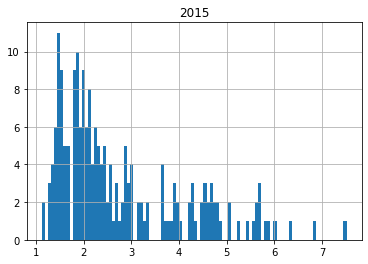

In [119]:
data_fert_2015 = data_fert[['Total fertility rate','2015']].dropna()
data_fert_2015.hist(bins=100)


In [120]:
data_fert_2015[data_fert_2015['2015']<1.7]

,Total fertility rate,2015
11,Armenia,1.41
12,Aruba,1.66
14,Austria,1.50
20,Belarus,1.51
27,Bosnia and Herzegovina,1.32
32,Bulgaria,1.57
37,Canada,1.68
42,Channel Islands,1.47
44,China,1.57
54,Croatia,1.52


### Life Expectancy table

In [123]:
data_lifeexp
print(data_lifeexp.columns)
data_lifeexp.isna().sum().max() # missing data must be corrected, column max # of na's is 59

counter = []
for i, country in enumerate(data_lifeexp['Life expectancy']):
    if country in list(data_cont['country']):
        counter.append(1)
sum(counter) # 176 of the countries in the life expectancy table also in continents table

Index(['Life expectancy',              1800,              1801,
                    1802,              1803,              1804,
                    1805,              1806,              1807,
                    1808,
       ...
                    2007,              2008,              2009,
                    2010,              2011,              2012,
                    2013,              2014,              2015,
                    2016],
      dtype='object', length=218)


176

array([[<AxesSubplot:title={'center':'2015'}>]], dtype=object)

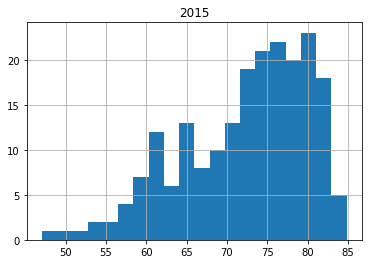

In [132]:
data_lifeexp_2015 = data_lifeexp[['Life expectancy',2015]].dropna()
data_lifeexp_2015.hist(bins=20)

### Populations table

In [134]:
data_pop
data_pop.shape
print(data_pop.columns)
data_pop = data_pop[data_pop.columns.drop(list(data_pop.filter(regex='Unnamed:')))]
data_pop
data_pop.isna().sum().max() # missing data must be corrected, column max # of na's is 46, which means all values are missing

counter = []
for i, country in enumerate(data_pop['Total population']):
    if country in list(data_cont['country']):
        counter.append(1)
sum(counter) # 176 of the countries in the life expectancy table also in populations table

Index(['Total population',               1800,               1810,
                     1820,               1830,               1840,
                     1850,               1860,               1870,
                     1880,               1890,               1900,
                     1910,               1920,               1930,
                     1940,               1950,               1951,
                     1952,               1953,               1954,
                     1955,               1956,               1957,
                     1958,               1959,               1960,
                     1961,               1962,               1963,
                     1964,               1965,               1966,
                     1967,               1968,               1969,
                     1970,               1971,               1972,
                     1973,               1974,               1975,
                     1976,               1977,               1

176

,Total population,2015
44,China,1.376049e+09
101,India,1.311051e+09


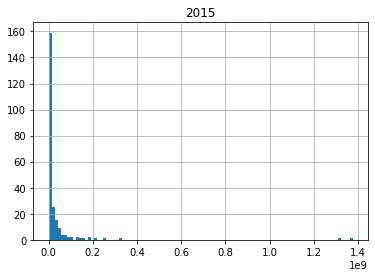

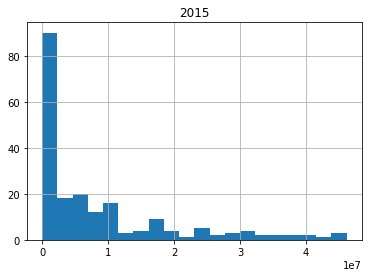

In [162]:
data_pop_2015 = data_pop[['Total population', 2015]].dropna()
data_pop_2015.hist(bins=100)
q3 = data_pop_2015.quantile(0.75)
q1 = data_pop_2015.quantile(0.25)
outl_thres = int(q3 + 1.5 * (q3 - q1))

data_pop_2015_no_outl = data_pop_2015[data_pop_2015[2015]<outl_thres]
data_pop_2015_no_outl.hist(bins=20)

data_pop_2015[data_pop_2015[2015]>1000000000] # China and India are clear outliers

### Internet Users table

In [440]:
data_internet.isna().sum().max() # remove na's, max 34
#data_internet_2019 = pd.DataFrame(data_internet['2019'].unique()).apply(x.replace('M', '000000') for x in df['2019'])
#[x.replace('M', '000000') for x in data_internet['2019']]
#print(data_internet_2019)

0

## Data wrangling

### Clean

In [442]:
df_cont = data_cont

df_fert = pd.melt(data_fert,id_vars = 'Total fertility rate').dropna()
df_fert.columns = ['country', 'year', 'fertility_rate']
df_fert = df_fert.astype({'year': 'int', 'fertility_rate': 'float'})

df_lifeexp = pd.melt(data_lifeexp, id_vars = "Life expectancy").dropna()
df_lifeexp.columns = ['country', 'year', 'life_expectancy']
df_lifeexp = df_lifeexp.astype({'year': 'int', 'life_expectancy': 'float'})

df_pop = pd.melt(data_pop, id_vars = 'Total population').dropna()
df_pop.columns = ['country', 'year', 'total_population']
df_pop = df_pop.astype({'year': 'int', 'total_population': 'int'})

df_internet = pd.melt(data_internet, id_vars='country')
df_internet.columns = ['country','year','internet_users']
#df_internet['units'] = [1000000 if 'M' in df_internet['internet_users']]

print(
    'df_fert shape:', df_fert.shape,
    '\ndf_lifeexp shape:', df_lifeexp.shape,
    '\ndf_pop shape', df_pop.shape
    )

df_fert shape: (43412, 3) 
df_lifeexp shape: (43857, 3) 
df_pop shape (20176, 3)


In [428]:
df_internet

,country,year,internet_users
0,Angola,1990,0
1,Albania,1990,0
2,Andorra,1990,0
3,United Arab Emirates,1990,0
4,Argentina,1990,0
...,...,...,...
4855,Vanuatu,2019,77.1k
4856,Yemen,2019,7.79M
4857,South Africa,2019,32.9M
4858,Zambia,2019,2.55M


### Merge

In [212]:
df_subm1 = pd.merge(df_fert, df_lifeexp, how = "left", on = ['country', 'year'])
df_subm2 = pd.merge(df_subm1, df_pop, how = "left", on = ['country', 'year'])
df_merge = pd.merge(df_subm2, df_cont, how = 'left', on = 'country') # 43412 rows

df_merge.shape

(43412, 6)

In [213]:
df_merge

,country,year,fertility_rate,life_expectancy,total_population,continent
0,Afghanistan,1800,7.00,28.21,3280000.0,Asia
1,Albania,1800,4.60,35.40,410445.0,Europe
2,Algeria,1800,6.99,28.82,2503218.0,Africa
3,Angola,1800,6.93,26.98,1567028.0,Africa
4,Antigua and Barbuda,1800,5.00,33.54,37000.0,North America
...,...,...,...,...,...,...
43407,Vietnam,2015,1.70,75.40,93447601.0,Asia
43408,Virgin Islands (U.S.),2015,2.45,80.60,106291.0,NaN
43409,Yemen,2015,3.83,66.00,26832215.0,Asia
43410,Zambia,2015,5.59,56.70,16211767.0,Africa


## Sample Plots

/Users/brunnogorgulhosoares/OneDrive/spiced/random-forest-fennel-student-code/01_week


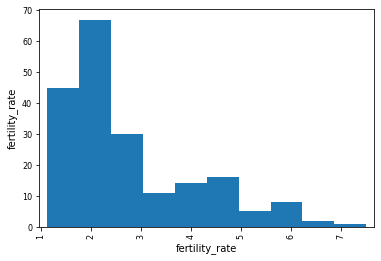

In [286]:
pd.plotting.scatter_matrix(df_merge[df_merge['year']==2015][['fertility_rate']])
despine=True

In [249]:
df_plot = df_merge[(df_merge['year']==2015) & (~df_merge['country'].isin(['China', 'India']))]

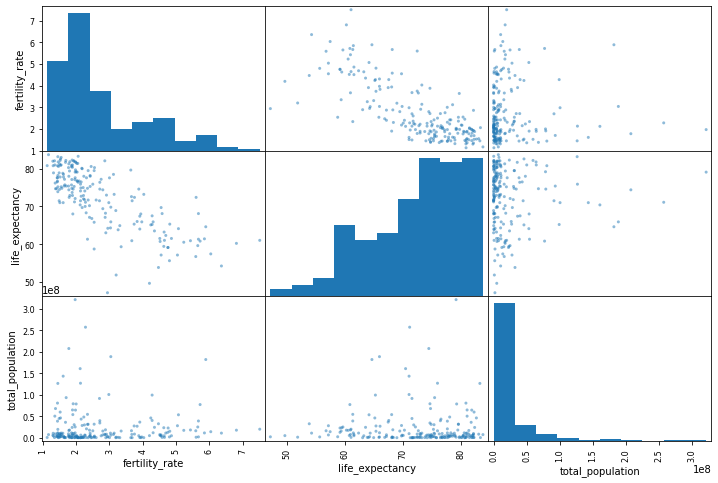

In [250]:
pd.plotting.scatter_matrix(df_plot[['fertility_rate', 'life_expectancy', 'total_population']], figsize=(12,8))
despine=True
# EXCLUDES CHINA AND INDIA

In [265]:
# Parameters
x = 'fertility_rate'
y = 'life_expectancy'
year = 2015

,fertility_rate,life_expectancy
fertility_rate,1.000000,-0.757496
life_expectancy,-0.757496,1.000000


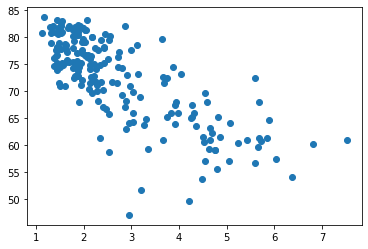

In [267]:
plt.scatter(df_plot[x], df_plot[y])
df_plot[[x, y]].corr(method='pearson')

In [407]:
#fert_avg = df_merge[df_merge['year']>1900].groupby('year')['fertility_rate'].mean()
#plt.plot(fert_avg)

df_exper_1960 = df_merge[df_merge['year']==1960][['country','fertility_rate']]
df_exper_1960.rename(columns={'country':'country', 'fertility_rate': 'fert_rate_1960'}, inplace=True)

df_exper_2015 = df_merge[df_merge['year']==2015][['country','fertility_rate']]
df_exper_2015.rename(columns={'country':'country', 'fertility_rate': 'fert_rate_2015'}, inplace=True)

df_exper = df_exper_1960.merge(df_exper_2015)
df_exper.set_index('country')
df_exper['fert_delta'] = df_exper['fert_rate_2015'] - df_exper['fert_rate_1960']
df_exper = df_exper.sort_values('fert_delta')
df_exper.head(30)


,country,fert_rate_1960,fert_rate_2015,fert_delta
41,Costa Rica,7.31,1.77,-5.54
102,Libya,7.54,2.26,-5.28
151,St. Vincent and the Grenadines,7.22,1.95,-5.27
185,United Arab Emirates,6.93,1.77,-5.16
49,Dominican Republic,7.56,2.42,-5.14
150,St. Lucia,6.97,1.87,-5.10
180,Tunisia,7.04,1.97,-5.07
12,Bahrain,7.09,2.03,-5.06
82,Iran,6.93,1.91,-5.02
145,Qatar,6.97,1.98,-4.99


## Animated Scatter plot

In [408]:
plt.style.use('seaborn')

for year in range(1960, 2015+1):
    plt.axis((0,10,0,90))
    df_split = df_merge[df_merge['year']==year]
    plt.scatter(x=df_split['fertility_rate'], y=df_split['life_expectancy'], s=df_split['total_population']/5000000)
    plt.title('Progress of Countries', size=20)
    plt.xlabel('Fertility Rate', size=15)
    plt.ylabel('Life Expectancy', size=15)
    plt.legend([str(year)], fontsize='x-large')
    plt.savefig('data/lifeexp_'+str(year)+'.png', dpi=200)
    plt.close()

In [409]:
import imageio

images =[]

for i in range(1960, 2015+1):
    filename = 'data/lifeexp_{}.png'.format(i)
    images.append(imageio.imread(filename))

imageio.mimsave('output.gif', images, fps=12)